# Support Vector Machine

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/KernelFunctions.jl/blob/master/examples/support-vector-machine/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/support-vector-machine/).*

In [1]:
using Distributions
using KernelFunctions
using LIBSVM
using LinearAlgebra
using Plots
using Random

# Set plotting theme
theme(:wong)

# Set seed
Random.seed!(1234);

Number of samples:

In [2]:
N = 100;

Select randomly between two classes:

In [3]:
y_train = rand([-1, 1], N);

Random attributes for both classes:

In [4]:
X = Matrix{Float64}(undef, 2, N)
rand!(MvNormal(randn(2), I), view(X, :, y_train .== 1))
rand!(MvNormal(randn(2), I), view(X, :, y_train .== -1));
x_train = ColVecs(X);

Create a 2D grid:

In [5]:
test_range = range(floor(Int, minimum(X)), ceil(Int, maximum(X)); length=100)
x_test = ColVecs(mapreduce(collect, hcat, Iterators.product(test_range, test_range)));

Create kernel function:

In [6]:
k = SqExponentialKernel() ∘ ScaleTransform(2.0)

Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Scale Transform (s = 2.0)

[LIBSVM](https://github.com/JuliaML/LIBSVM.jl) can make use of a pre-computed kernel matrix.
KernelFunctions.jl can be used to produce that.
Precomputed matrix for training (corresponds to linear kernel)

In [7]:
model = svmtrain(kernelmatrix(k, x_train), y_train; kernel=LIBSVM.Kernel.Precomputed)

LIBSVM.SVM{Int64}(LIBSVM.SVC, LIBSVM.Kernel.Precomputed, nothing, 1, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Int64}}(66, Int32[34, 32], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1 5 … 95 100], Int32[1, 5, 6, 9, 11, 19, 20, 22, 24, 31  …  79, 81, 82, 87, 88, 91, 93, 94, 95, 100], LIBSVM.SVMNode[LIBSVM.SVMNode(0, 1.0), LIBSVM.SVMNode(0, 5.0), LIBSVM.SVMNode(0, 6.0), LIBSVM.SVMNode(0, 9.0), LIBSVM.SVMNode(0, 11.0), LIBSVM.SVMNode(0, 19.0), LIBSVM.SVMNode(0, 20.0), LIBSVM.SVMNode(0, 22.0), LIBSVM.SVMNode(0, 24.0), LIBSVM.SVMNode(0, 31.0)  …  LIBSVM.SVMNode(0, 79.0), LIBSVM.SVMNode(0, 81.0), LIBSVM.SVMNode(0, 82.0), LIBSVM.SVMNode(0, 87.0), LIBSVM.SVMNode(0, 88.0), LIBSVM.SVMNode(0, 91.0), LIBSVM.SVMNode(0, 93.0), LIBSVM.SVMNode(0, 94.0), LIBSVM.SVMNode(0, 95.0), LIBSVM.SVMNode(0, 100.0)]), 0.0, [0.0011515178246988868; 1.0; … ; -1.0; -1.0], Float64[], Float64[], [-0.10543655890804106], 3, 0.01, 200.0, 0.001, 

Precomputed matrix for prediction

In [8]:
y_pr, _ = svmpredict(model, kernelmatrix(k, x_train, x_test));

Compute prediction on a grid:

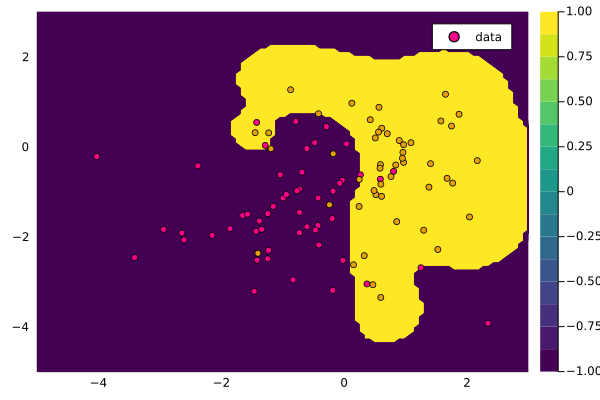

In [9]:
contourf(test_range, test_range, y_pr)
scatter!(X[1, :], X[2, :]; color=y_train, lab="data", widen=false)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*